# New Section




1/1 [==============================] - 1s 1s/step


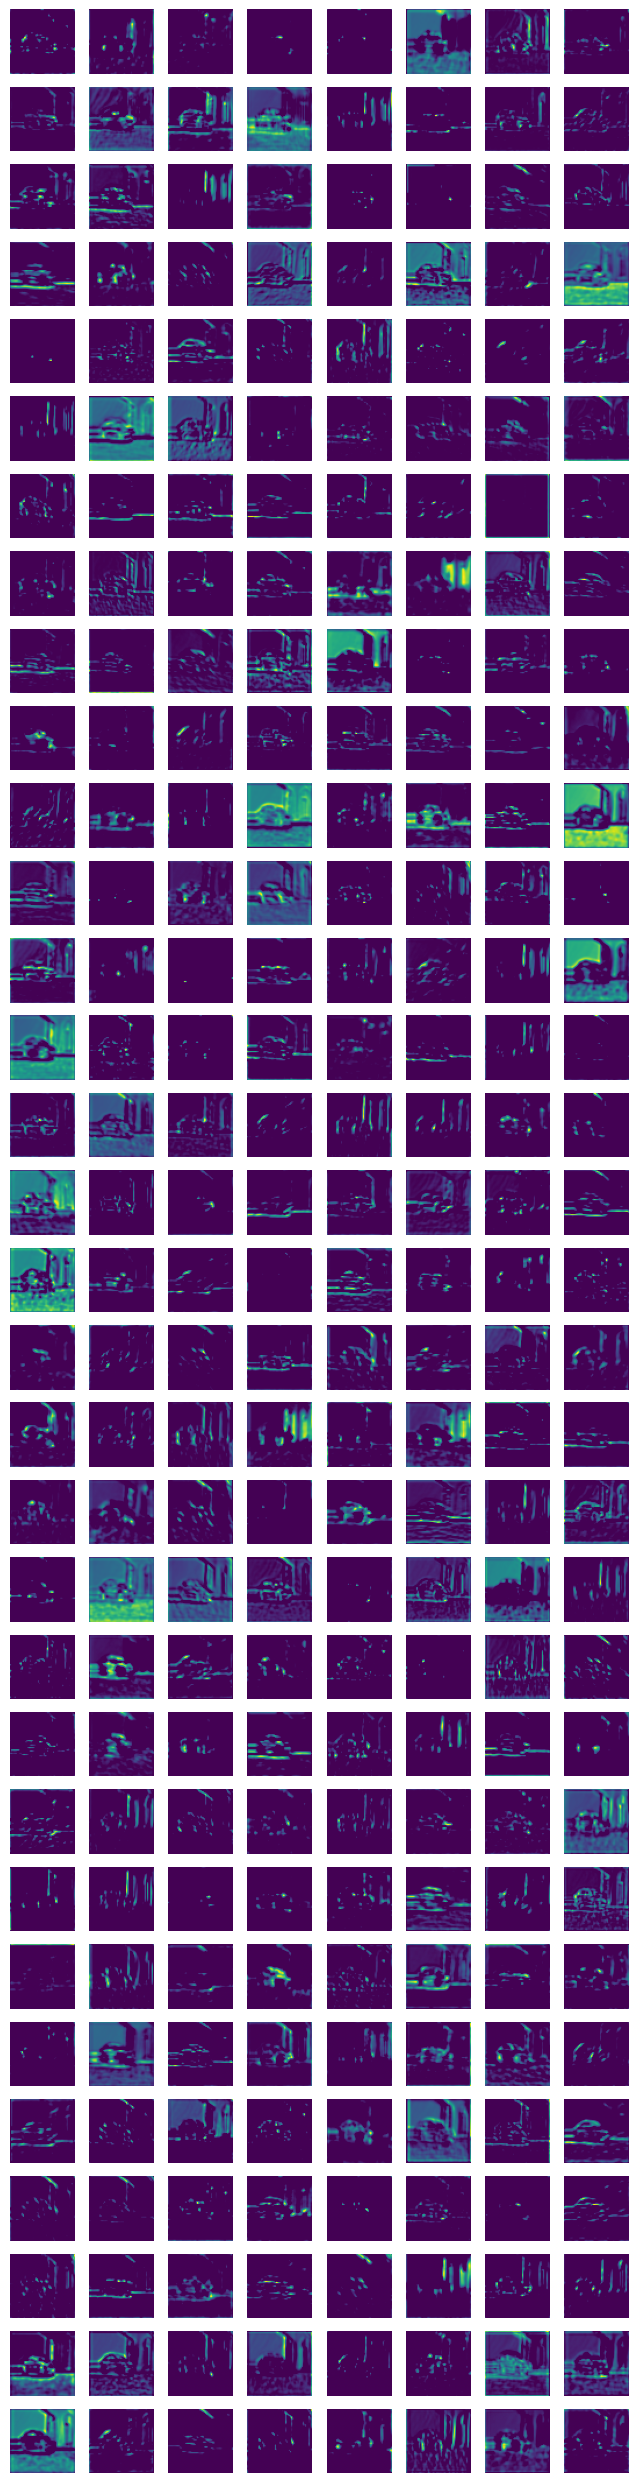

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3

# Load a pre-trained CNN model
model_name = 'VGG16'  # Change to 'VGG19', 'ResNet50', or 'InceptionV3' as needed

if model_name == 'VGG16':
    base_model = VGG16(weights='imagenet', include_top=False)
    layer_name = 'block3_conv3'  # Change to the desired layer name in VGG16
elif model_name == 'VGG19':
    base_model = VGG19(weights='imagenet', include_top=False)
    layer_name = 'block3_conv4'  # Change to the desired layer name in VGG19
elif model_name == 'ResNet50':
    base_model = ResNet50(weights='imagenet', include_top=False)
    layer_name = 'conv5_block3_out'  # Change to the desired layer name in ResNet50
elif model_name == 'InceptionV3':
    base_model = InceptionV3(weights='imagenet', include_top=False)
    layer_name = 'mixed5'  # Change to the desired layer name in InceptionV3

# Load your image
img_path = 'test_img.png'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0

# Create a model for visualization
activation_model = tf.keras.models.Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Visualize the activations
activations = activation_model.predict(img)
num_filters = activations.shape[-1]
cols = 8
rows = num_filters // cols + 1

plt.figure(figsize=(cols, rows))
for i in range(num_filters):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(activations[0, :, :, i], cmap='viridis') #gray
    plt.axis('off')

plt.show()
